# Índice

- 1. [Importar librerías](#importar-librerias)
- 2. [Carga Archivos](#Carga-de-datos)
- 3. [Correlaciones](#Correlaciones)
- 4. [Graficos](#Multiple-graficas)
   - 4.1. [Multiple Graficas](#Multiple-graficas)
   - 4.2. [Multiple Graficas en FOR](#Graficas-ciclo-For)
- 5. [Generar Imagenes](#Guardar-salidas-como-imagenes)
    - 5.1. [Generar Imagenes](#Guardar-salidas-como-imagenes)
    - 5.2. [Generar Gif](#Guardar-gif)
- 6. [Correlaciones](#CORRELACIONES)
    - 6.1. [Pearson](#Correlacion-Pearson)
    - 6.2. [Spearman](#Correlacion-Spearman)
    - 6.3. [Kendall](#Correlacion-Kendall)
    - 6.4. [Usando Pandas vs. Scipy](#Otra-forma-de-calcularlos-con-Pandas)
    
- 7. [Correlaciones Completas](#Correlaciones-completas)
    - 7.1. [Comparacion de Correlaciones](#Comparando-Spearman-contra-Kendall) 
- 8. [Conclusión](#Conclusion)

In [1]:
#! pip install imageio

## 1. Importar librerías <a id="importar-librerias"></a>

In [2]:
import pandas as pd
import numpy as np #Paquete para manejar arreglos (vector . arreglo unidimensional - matrix - arreglo bidimensional)
import matplotlib.pyplot as plt
import json
import seaborn as sns
from scipy import stats
import imageio
import imageio.v2 as imageio
from scipy.stats import pearsonr,spearmanr, kendalltau

[Volver Arriba](#Índice)

# Carga de datos

In [3]:
#carga de datos
df = pd.read_csv("Datos/orofaringe.txt", sep='\t')
df.head()

,CASO,INST,SEXO,TRAT,GRADO,EDAD,COND,SITIO,ETAPA_T,ETAPA_N,ENTRADA,ESTADO,TIEMPO
0,1,2,2,1,1,51,1,2,3,1,2468,1,631
1,2,2,1,2,1,65,1,4,2,3,2968,1,270
2,3,2,1,1,2,64,2,1,3,3,3368,1,327
3,4,2,1,1,1,73,1,1,4,0,5768,1,243
4,5,5,1,2,2,64,1,1,4,3,9568,1,916


[Volver Arriba](#Índice)

# Correlaciones

In [4]:
#usar random.multivariate_normal

In [5]:
mu = [0,0]#Medias Vector de medias
rho = 0.9 #Cantidad de correlación de los datos

sigma = [[1,rho],  # matriz Correlacion  o Covarianzas estandarizadas
         [rho,1]] #  - diag 1 - antidiag rho

### toda matriz de correlacion -> Matriz de covarianzas (matriz de covarianza estandarizada)
### Pero en sentido contrario no aplica, es decir, 
### NO TODA MATRIZ de Covarianzas -> Matriz de Correlacion

n = 1000 # Cantidad de datos a simular 

### random.multivariate_normal(mean, cov, size=None, check_valid='warn', tol=1e-8)


In [6]:
X = np.random.multivariate_normal(mu, sigma, n)
#print(X)

In [7]:
print(X[0,:], X[1,:])

[-2.1122438  -2.46848596] [1.16857006 1.69580642]


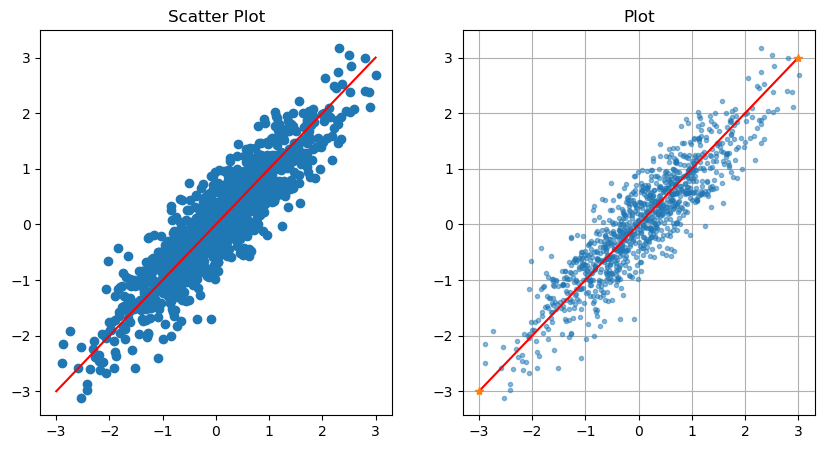

In [8]:
# Crear una figura con 1 fila y 2 columnas
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Graficar en el primer subgráfico (primera columna)
axs[0].scatter(X[:, 0], X[:, 1])
axs[0].plot([-3,3],[-3,3],color='Red')
axs[0].set_title('Scatter Plot')

# Graficar en el segundo subgráfico (segunda columna)
axs[1].plot(X[:, 0], X[:, 1], '.', alpha=0.5)
axs[1].plot([-3,3],[-3,3],color='Red') 
axs[1].plot([-3,3],[-3,3],"*") 
axs[1].grid()
axs[1].set_title('Plot')

# Mostrar la figura
plt.show()

[Volver Arriba](#Índice)

# Multiple graficas

## Hagamos varias graficas manualmente

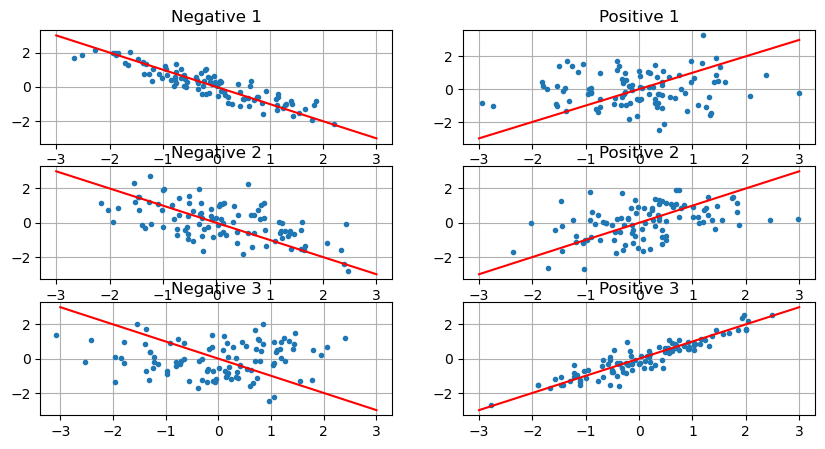

In [9]:
mu = [0,0]#Medias Vector de medias
rho_neg_1 = -0.9 #Cantidad de correlación de los datos
rho_neg_2 = -0.5 #Cantidad de correlación de los datos
rho_neg_3 = -0.1 #Cantidad de correlación de los datos
rho_pos_1 = 0.1 #Cantidad de correlación de los datos
rho_pos_2 = 0.5 #Cantidad de correlación de los datos
rho_pos_3 = 0.9 #Cantidad de correlación de los datos

sigma1 = [[1,rho_neg_1],[rho_neg_1,1]] 
sigma2 = [[1,rho_neg_2],[rho_neg_2,1]] 
sigma3 = [[1,rho_neg_3],[rho_neg_3,1]] 
sigma4 = [[1,rho_pos_1],[rho_pos_1,1]] 
sigma5 = [[1,rho_pos_2],[rho_pos_2,1]] 
sigma6 = [[1,rho_pos_3],[rho_pos_3,1]] 


n = 100 # Cantidad de datos a simular 

X1 = np.random.multivariate_normal(mu, sigma1, n)
X2 = np.random.multivariate_normal(mu, sigma2, n)
X3 = np.random.multivariate_normal(mu, sigma3, n)
X4 = np.random.multivariate_normal(mu, sigma4, n)
X5 = np.random.multivariate_normal(mu, sigma5, n)
X6 = np.random.multivariate_normal(mu, sigma6, n)


# Crear una figura con 3 fila y 2 columnas
fig, axs = plt.subplots(3, 2, figsize=(10, 5))

# Graficar en el segundo subgráfico (segunda columna)
axs[0,0].plot(X1[:, 0], X1[:, 1], '.')
axs[0,0].plot([3,-3],[-3,3],color='Red') 
axs[0,0].grid()
axs[0,0].set_title('Negative 1')

# Graficar en el segundo subgráfico (segunda columna)
axs[1,0].plot(X2[:, 0], X2[:, 1], '.')
axs[1,0].plot([3,-3],[-3,3],color='Red') 
axs[1,0].grid()
axs[1,0].set_title('Negative 2')

# Graficar en el segundo subgráfico (segunda columna)
axs[2,0].plot(X3[:, 0], X3[:, 1], '.')
axs[2,0].plot([3,-3],[-3,3],color='Red') 
axs[2,0].grid()
axs[2,0].set_title('Negative 3')

# Graficar en el segundo subgráfico (segunda columna)
axs[0,1].plot(X4[:, 0], X4[:, 1], '.')
axs[0,1].plot([-3,3],[-3,3],color='Red') 
axs[0,1].grid()
axs[0,1].set_title('Positive 1')

# Graficar en el segundo subgráfico (segunda columna)
axs[1,1].plot(X5[:, 0], X5[:, 1], '.')
axs[1,1].plot([-3,3],[-3,3],color='Red') 
axs[1,1].grid()
axs[1,1].set_title('Positive 2')

# Graficar en el segundo subgráfico (segunda columna)
axs[2,1].plot(X6[:, 0], X6[:, 1], '.')
axs[2,1].plot([-3,3],[-3,3],color='Red') 
axs[2,1].grid()
axs[2,1].set_title('Positive 3')

# Mostrar la figura
plt.show()

# Graficas ciclo For

In [10]:
#Rhos = np.linspace(-1,1,70)
Rhos = np.round(np.arange(-1,1,0.1),2)
mu = [0,0] #Vector de medias
filenames =[]
n = 1000
index = 1
! rmdir /s /q images
! mkdir images
for rho in Rhos:
    sigma=[[1,rho],[rho,1]] #Matriz de correlacion
    X = np.random.multivariate_normal(mu, sigma, n) #Generamos los datos aleatorios
    
    fig, ax = plt.subplots(1, 1, figsize=(6, 6))
    ax.plot(X[:, 0], X[:, 1],'.',alpha=0.5)
    ax.set_title(f"Rho = {rho}")  # Corrección aquí
    ax.set_xlim(-3, 3)  
    ax.set_ylim(-3, 3) 

    ax.grid()
    for i in range (5):
            filename = f"images/{index}_{i}.png"
            filenames.append(filename)
            plt.savefig(filename)
    index+=1
    #plt.show()
    plt.close()
    

[Volver Arriba](#Índice)

## Guardar salidas como imagenes

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.plot(X[:, 0], X[:, 1],'.')
ax.set_title(f"Rho = {rho}")  # Corrección aquí
ax.grid()
plt.close()
plt.savefig("ejemplo.png") ## <---

<Figure size 640x480 with 0 Axes>

# Guardar gif

In [12]:
with imageio.get_writer("images/correlaciones.gif",mode="I", duration=250) as escritor:
    for path in filenames:
        image = imageio.imread(path)
        escritor.append_data(image)
escritor.close()

[Volver Arriba](#Índice)

# CORRELACIONES

# Mirando las distintas correlaciones

In [13]:
rho = 0.83
mu = [0,0] #Vector de medias
n=1000
sigma=[[1,rho],[rho,1]] #Matriz de correlacion
X = np.random.multivariate_normal(mu, sigma, n) #Generamos los datos aleatorios

#### Correlacion Pearson
1. Correlacion de pearson(mide linealidad)

In [14]:
#corr_p = np.corrcoef(X[:,0],X[:,1])[0,1]
corr_p,_ = pearsonr(X[:,0],X[:,1])

#### Correlacion Spearman
2. Correlacion de Spearman(mide linealidad)

p-value - test de significancia del a correlacional

In [15]:
#corr_sp =  spearmanr(X[:,0],X[:,1])[0]
corr_sp,_ =  spearmanr(X[:,0],X[:,1])

#### Correlacion Kendall 

3. Correlacion de Kendall - Tau

In [16]:
corr_tau, _ =  kendalltau(X[:,0],X[:,1])

In [17]:
print(f"Correlacion Pearson: {corr_p}\n\nCorrelacion Spearman: {corr_sp}\n\nCorrelacion Kendall: {corr_tau}")

Correlacion Pearson: 0.816177682077818

Correlacion Spearman: 0.8210863010863011

Correlacion Kendall: 0.6193873873873874


# Otra forma de calcularlos con Pandas

In [18]:
rho = 0.83
mu = [0,0] #Vector de medias
n=1000
sigma=[[1,rho],[rho,1]] #Matriz de correlacion
datos = np.random.multivariate_normal(mu, sigma, n) #99999 Datos Centrados en 0,0 con la matriz de covarianza Sigma
df = pd.DataFrame(datos, columns=['X', 'Y'])
pearson_corr = df.corr(method='pearson')['X']['Y']  
kendall_corr = df.corr(method='kendall')['X']['Y']  
spearman_corr = df.corr(method='spearman')['X']['Y']
print(f"Correlacion Pearson: {pearson_corr}\n\nCorrelacion Spearman: {kendall_corr}\n\nCorrelacion Kendall: {spearman_corr}")

Correlacion Pearson: 0.8283637416056306

Correlacion Spearman: 0.6227467467467468

Correlacion Kendall: 0.8166703686703687


## Caso Particular de correlaciones (Para no lineales)
podemos identificar que pearson no es lineal


Ejemplificando el hecho de SPEARMAN y KENDALL NO necesariamente consideran estructuras de dependencia lineal

Solo PEARSON supone linealidad en los datos

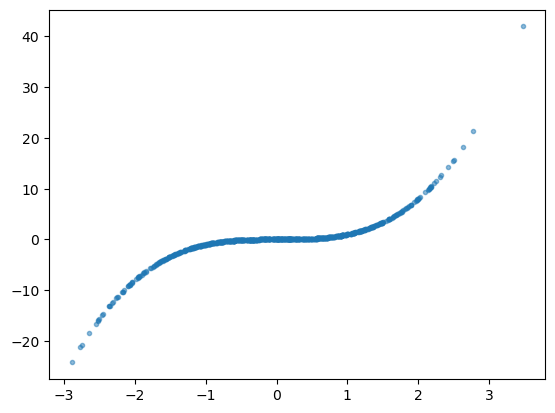

In [19]:
x = np.random.normal(0,1,1000)
y = x**3 # correlacion perfecta no lineal
plt.plot(x,y,'.',alpha=0.5)

In [20]:
corr_p,_ = pearsonr(x,y)
corr_sp,_ =  spearmanr(x,y)
corr_tau, _ =  kendalltau(x,y)
print(f"Correlacion Pearson: {corr_p}\n\nCorrelacion Spearman: {corr_sp}\n\nCorrelacion Kendall: {corr_tau}")

Correlacion Pearson: 0.8011830482073828

Correlacion Spearman: 1.0

Correlacion Kendall: 1.0


[Volver Arriba](#Índice)

### Correlaciones completas

In [21]:
#Rhos = np.round(np.arange(-1,1,0.1),2)
Rhos = np.linspace(-1,1,500)
mu = [0,0]
n = 500
corr_p = np.zeros(len(Rhos))
corr_sp = np.zeros(len(Rhos))
corr_tau = np.zeros(len(Rhos))
for i, rho in enumerate(Rhos):
    sigma = [[1,rho],[rho,1]]
    X = np.random.multivariate_normal(mu, sigma, n)
    corr_p[i] = pearsonr(X[:,0],X[:,1])[0]
    corr_sp[i] =  spearmanr(X[:,0],X[:,1])[0]
    corr_tau[i] =  kendalltau(X[:,0],X[:,1])[0]
    
    #print(f"Correlacion Pearson: {corr_p}\n\nCorrelacion Spearman: {corr_sp}\n\nCorrelacion Kendall: {corr_tau}\n\n----\n\n")

otra forma incumpleta (abrir md)
<!-- Rhos = np.linspace(-1,1,1000)
mu = [0,0]
n = 1000
corr_p = np.zeros(len(Rhos))
corr_sp = np.zeros(len(Rhos))
corr_tau = np.zeros(len(Rhos))
for i, rho in enumerate(Rhos):
    sigma = [[1,rho],[rho,1]] #matriz de correlacion o covarianzas estandarizadas
    X = np.random.multivariate_normal(mu, sigma, n) ## Simuladno los n datos multivariantes
    corr_p.append(pearsonr(x,y)[0])         ### Pearson (Mide linealidad)
    corr_sp.append(spearmanr(x,y)[0])       ### Spearman
    corr_tau[i].append(kendalltau(x,y)[0])  ### Kendall
    
    #print(f"Correlacion Pearson: {corr_p}\n\nCorrelacion Spearman: {corr_sp}\n\nCorrelacion Kendall: {corr_tau}\n\n----\n\n")
-->

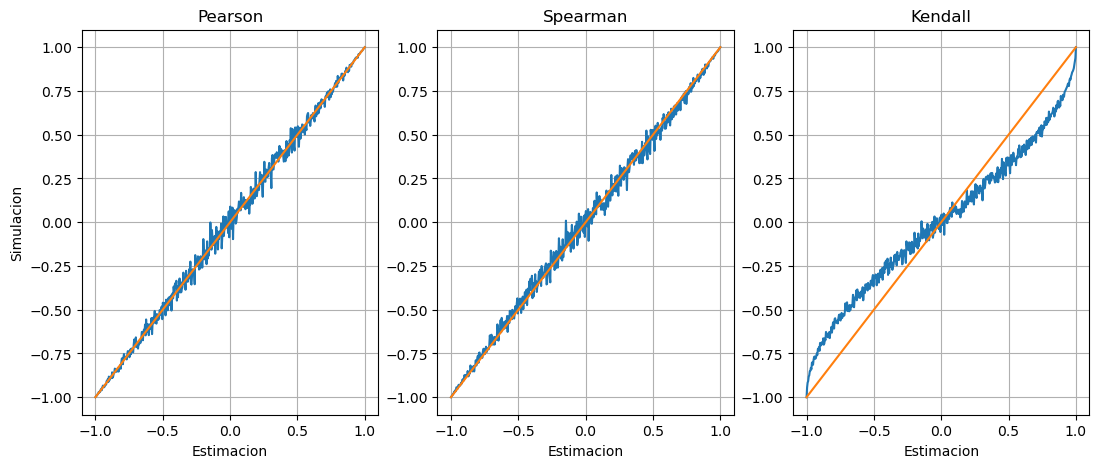

In [22]:
# Crear una figura con 1 fila y 2 columnas
fig, axs = plt.subplots(1, 3, figsize=(13, 5))

# Graficar en el primer subgráfico (primera columna)
axs[0].plot(Rhos,corr_p)
axs[0].plot(Rhos,Rhos)
axs[0].grid()
axs[0].set_xlabel("Estimacion")
axs[0].set_ylabel("Simulacion")
axs[0].set_title('Pearson')

axs[1].plot(Rhos,corr_sp)
axs[1].plot(Rhos,Rhos)
axs[1].grid()
axs[1].set_xlabel("Estimacion")
axs[1].set_title('Spearman')

axs[2].plot(Rhos,corr_tau)
axs[2].plot(Rhos,Rhos)
axs[2].set_xlabel("Estimacion")
axs[2].grid()
axs[2].set_title('Kendall')

# Mostrar la figura
plt.show()

[Volver Arriba](#Índice)

# Comparando Spearman contra Kendall

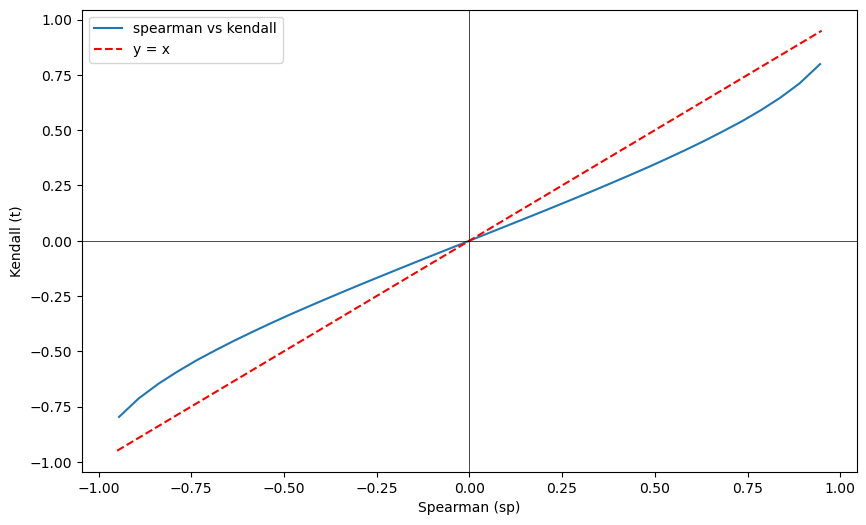

In [24]:
#Esta fue tarea de clase teorica 
kendall_correlations = []
spearman_correlations = []
#rho
rhos = np.arange(-0.95, 1.0, 0.05)

# Bucle
for rho in rhos:
    sigma = np.array([[1, rho], [rho, 1]]) #Matrix de covarianza
    datos = np.random.multivariate_normal([0, 0], sigma, 99999) #99999 Datos Centrados en 0,0 con la matriz de covarianza Sigma
    ## Usando df.corr para calcular Kendall y Spearman
    df = pd.DataFrame(datos, columns=['X', 'Y'])
    kendall_corr = df.corr(method='kendall')['X']['Y']  
    spearman_corr = df.corr(method='spearman')['X']['Y']
    
    kendall_correlations.append(kendall_corr)
    spearman_correlations.append(spearman_corr)
    
# Graficos
plt.figure(figsize=(10, 6))
plt.plot(spearman_correlations,kendall_correlations, label='spearman vs kendall')
#plt.plot(rhos, spearman_correlations, label='Spearman')
plt.plot(rhos, rhos, 'r--', label='y = x')
plt.axhline(0, color='black', linewidth=0.5) 
plt.axvline(0, color='black', linewidth=0.5)
plt.xlabel('Spearman (sp)')
plt.ylabel('Kendall (t)')
plt.legend()
plt.show()    

# Conclusion

Kendall tiende a subestimar los valores de simulacion lineal, suele estar por debajo del valore real, en el caso, tenemos un Rho conocido.

Esto puede ser para datos realmente pequeños, **para datos que nos siguen distribucion normal o correlaciones LINEALES seria mejor usar Spearman** 

La linealidad de pearson, tiene el supuesto de normalidad, pero no es el mejor para calcular correlaciones.

Si los datos estan contaminados Pearson tiene a fallar (contaminacion signficativa), pero el **Spearman** no se ve afectado.

Pendiente hacer ejercicio con contaminacion

[Volver Arriba](#Índice)